Grupo 5
Integrntes:
- Favio Di Ciocco
- Mauro Silberberg

# Guía 3

# 1) Puntos Fijos y Bifurcaciones

Crecimiento Poblacional Humano:
un modelo simple de crecimiento poblacional de organismos vivos
es ̇$\dot{N} = rN$,
donde $N(t) = N_0 e^{rt}$ es la población al tiempo $t$,
$r > 0$ es la tasa de crecimiento
y $N(t=0) = N_0$.
Es un hecho empírico que
el crecimiento exponencial predicho por este modelo
no puede continuar por siempre.
Un modelo más realista es
aquel propuesto por Verhulst (1838) para el crecimiento poblacional humano:
$$\dot{N} = r \Big(1 − \frac{N}{K} \Big) N \tag{1}$$
donde $K > 0$ es la capacidad de carga.

> a) Resuelva analiticamente el modelo (1)
para una dada condición inicial arbitraria $N(t=0) = N_0$.
Ayuda: utilice el cambio de variables: x = 1/N.

Tomando $x = 1 / N$,
tenemos $\dot{x} = -1/N^2 \; \dot{N}$,
y la ecuación queda:

$$\dot{x} = -r \; (x − \frac{1}{K})$$

cuya solución es

$$ x(t) = \left( \frac{1}{K}-\frac{1}{N_0} \right) e^{-rt} + \frac{1}{K} $$

Volviendo a las variables originales,
tenemos:

$$ N(t) = \frac{1}{\left( \frac{1}{K}-\frac{1}{N_0} \right) e^{-rt} + \frac{1}{K}} $$

> b) Encuentre los puntos fijos y estudie su estabilidad.
Grafique cualitativamente $N(t)$.

Los puntos fijos están dados por $\dot{N} = 0$,
y son $N=0$ y $N=K$.

Podemos estudiar la estabilidad a través del signo de la derivada:

$$ \frac{\partial \dot{N}}{\partial N} = r \; (1 - \frac{2N}{K}) $$

Para $N=0$,
$\left. \frac{\partial \dot{N}}{\partial N} \right|_{N=0} = r$,
y dado que $r>0$,
es un punto fijo inestable.
En cambio,
para $N=K$,
$\left. \frac{\partial \dot{N}}{\partial N}\right|_{N=K} = -r$,
y por tanto es un punto fijo estable.

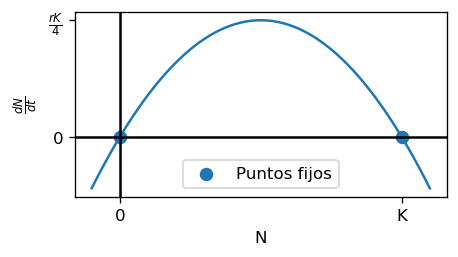

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r, K = 1, 1
N = np.linspace(-0.1, 1.1, 100)
dN = r * (1 - N/K) * N

plt.figure(figsize=(4, 2), dpi=120)
plt.plot(N, dN)
plt.scatter([0, K], [0, 0], s=50, label="Puntos fijos")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlabel("N")
plt.ylabel(r"$\frac{dN}{dt}$")
plt.xticks([0, K], [0, "K"])
plt.yticks([0, r * K/4], [0, r"$\frac{rK}{4}$"])
plt.legend()

> c) ¿Existen bifurcaciones en el modelo (1)? En caso afirmativo, estudie las mismas.

Hay bifurcaciones cuando $r$ y $K$ cambian de signo.
Pero no son valores posibles para el modelo planteado.

## 2) El sistema de Lorenz

> Considere el sistema de Lorenz (Lorenz 1963):
> $$ \begin{aligned}
\dot{x} &= σ(y − x) \\
\dot{y} &= ρx − y − xz \\
\dot{z} &= xy − βz \\
\end{aligned} $$
> donde $x$, $y$ y $z$ son funciones del tiempo
y $β=8/3$, $σ=10$ y $ρ$ parámetros del sistema.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

plt.rc("figure", dpi=100)


def lorenz(*, sigma, rho, beta):
    def lorenz_rhs(t, y):
        dy = np.empty_like(y)
        x, y, z = y
        dy[0] = sigma * (y - x)
        dy[1] = rho * x - y - x * z
        dy[2] = x * y - beta * z
        return dy

    return lorenz_rhs


solver_kwargs = dict(method="RK45", atol=1e-6, rtol=1e-6)

In [3]:
def plot_time_trajectories(fig, sol):
    axes = fig.axes
    if len(axes) == 0:
        axes = fig.subplots(3, sharex=True)
    
    for ax, y, label in zip(axes, sol.y, "xyz"):
        ax.plot(sol.t, y)
        ax.set(ylabel=label)
    ax.set(xlabel="Tiempo")
    fig.align_ylabels()

def plot_xz(fig, sol, label="$W_0$"):
    if len(fig.axes) == 0:
        ax = fig.subplots()
    else:
        ax = fig.axes[0]

    ax.plot(sol.y[1], sol.y[2])
    ax.scatter(sol.y[1][0], sol.y[2][0], label=label)
    ax.set(xlabel="y", ylabel="z")
    ax.legend()

def plot_3d(fig, sol):
    if len(fig.axes) == 0:
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig.axes[0]

    ax.plot(*sol.y)
    ax.set(xlabel="x", ylabel="y", zlabel="z")

def plot(fig, sol):
    figs = fig.subfigs
    if len(figs) == 0:
        figs = fig.subfigures(ncols=3)
    
    plot_time_trajectories(figs[0], sol)
    plot_xz(figs[1], sol)
    plot_3d(figs[2], sol)

### a)
> Resuelva numéricamente el sistema de Lorenz
hasta $t = 50$
usando la condición inicial $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.5)$,
y $ρ = 2$.
Grafique $y(t)$ y $z(t)$
y la trayectoria en el espacio de fase proyectada en el plano
$y − z$ (es decir $y(z)$).
¿A qué dinámica corresponde esta solución?
Utilice un método con paso de tiempo variable:
`scipy.integrate.ode(f).set_integrator(‘dopri5’)` en SciPy.

Esta condición inicial tiende a un punto fijo en el espacio de fases.

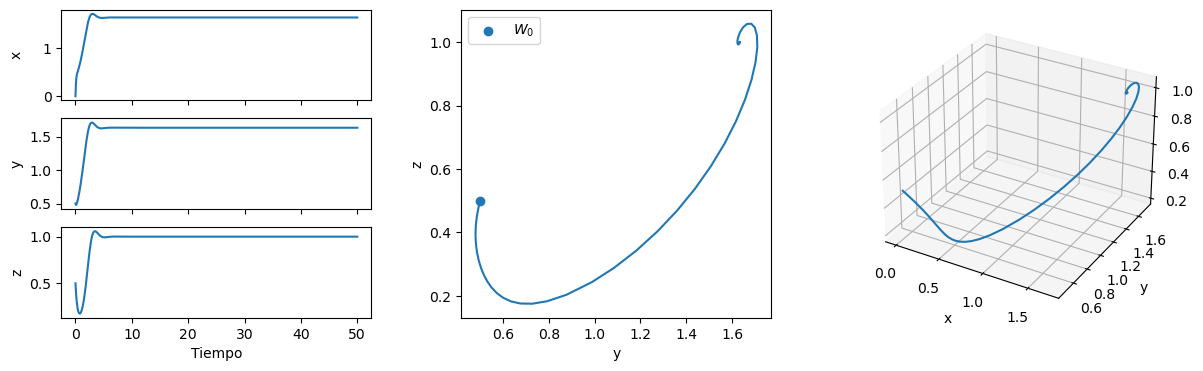

In [4]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=2),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### b)
> Para la misma condición inicial,
utilice
(i) $ρ = 10$ y
(ii) $ρ = 24$.
Grafique $y(t)$ y $z(t)$,
$y(z)$,
y la trayectoria en el espacio de fases tridimensional $(x, y, z)$.
¿Cómo cambian las soluciones?

Las soluciones también tienden a un punto fijo,
pero las trayectorias oscilan al acercarse a este.

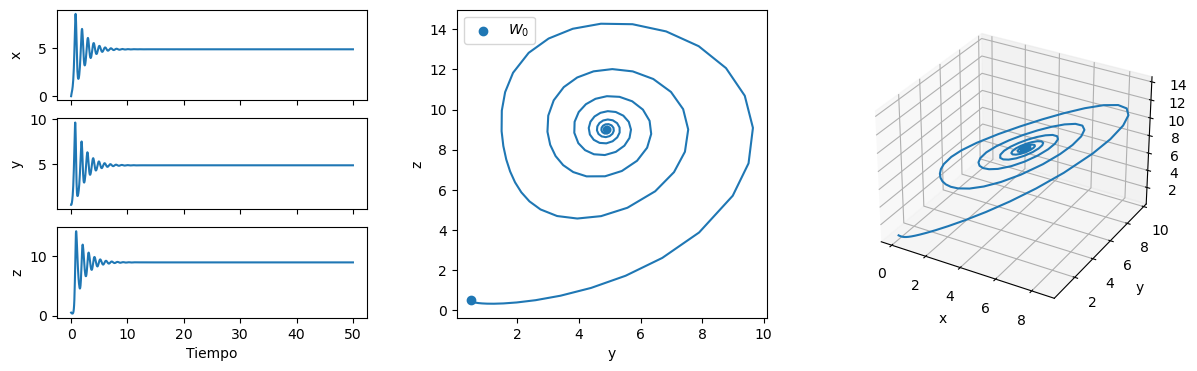

In [5]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=10),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

En cambio,
para $\rho = 24$,
la solución parece tender a un ciclo límite,
donde las 3 variables oscilan alrededor de un punto del espacio de fase.

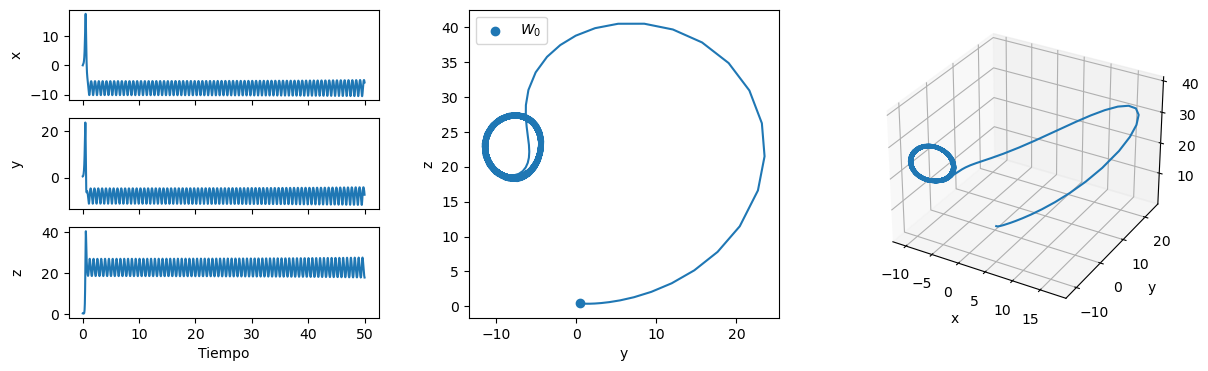

In [6]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=24),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### c)
> Para $ρ=25$ grafique nuevamente $y(t)$ y $z(t)$, $y(z)$, y la trayectoria en el espacio de fases tridimensional.
Compare las soluciones numéricas $ρ=24$ y $ρ=25$.
¿La solución con $ρ=24$ va a continuar igual para todo tiempo? ¿Por qué?

A diferencia del caso anterior,
para $\rho = 25$,
la solución muestra aspectos de un sistema caótico.
La solución oscila alrededor de dos "ciclos límite",
saltando entre uno y otro de manera "impredecible".

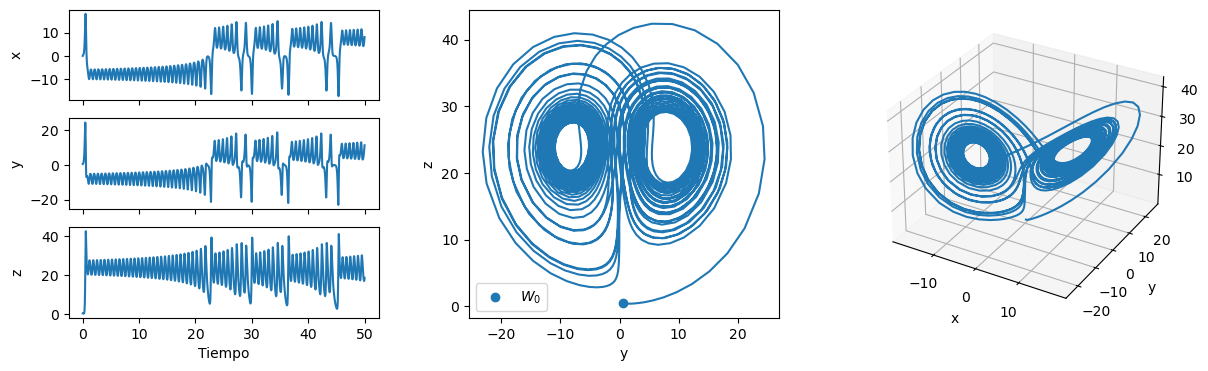

In [7]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=25),
    t_span=(0, 50),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

Si evolucionamos el caso de $\rho = 24$ para tiempos mayores,
se observa que también tiene comportamiento caótico.

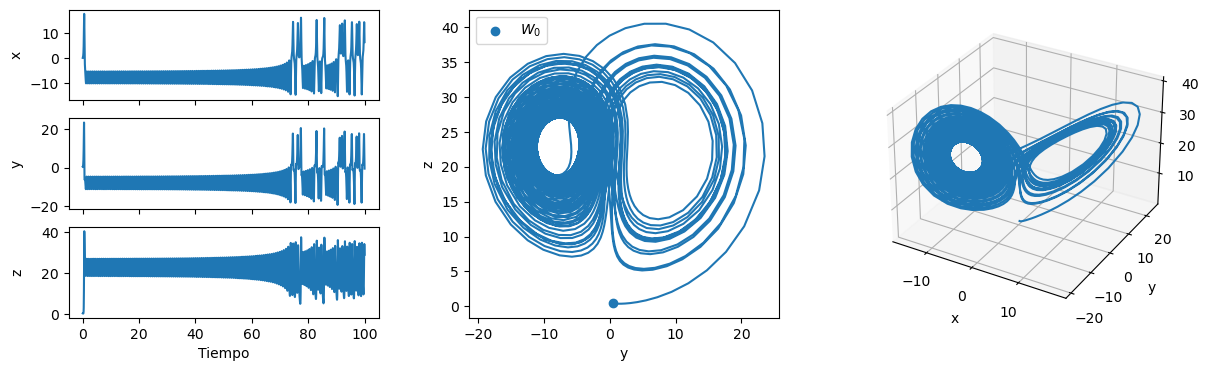

In [8]:
sol = solve_ivp(
    lorenz(sigma=10, beta=8 / 3, rho=24),
    t_span=(0, 100),
    y0=(0, 0.5, 0.5),
    **solver_kwargs,
)

fig = plt.figure(figsize=(12, 4))
plot(fig, sol)

### d)
> Para $ρ=30$ muestre la evolución temporal de $y$
para las siguientes condiciones iniciales:
(i) $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.5)$ y
(ii) $W_0 = (x_0, y_0, z_0) = (0, 0.5, 0.50001)$.
¿Qué observa?

Las dos soluciones se mueven juntas en el espacio de fases para tiempos cortos.
Incluso para los saltos entre los dos atractores.
Pero, a partir de cierto tiempo, se separan,
y la dinámica de una solución no nos informa nada sobre la dinámica de la otra.

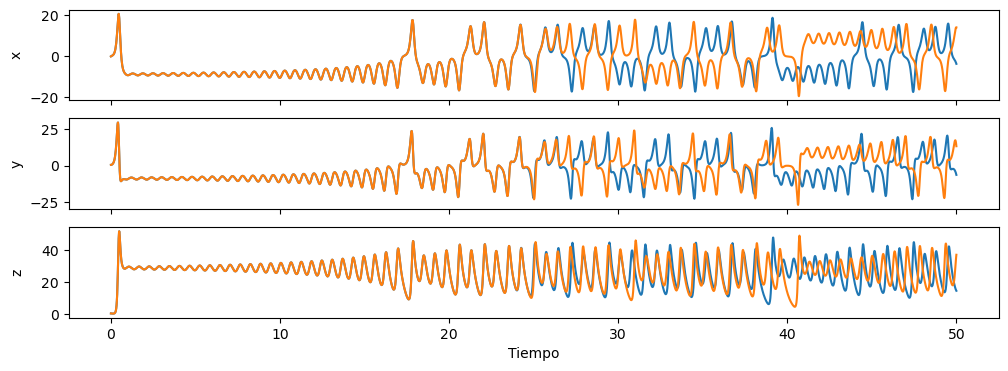

In [9]:
fig = plt.figure(figsize=(12, 4))

for z0 in (0.5, 0.50001):
    sol = solve_ivp(
        lorenz(sigma=10, beta=8 / 3, rho=30),
        t_span=(0, 50),
        y0=(0, 0.5, z0),
        **solver_kwargs,
    )
    plot_time_trajectories(fig, sol)

## e) (opcional)
> Resuelva numéricamente las ecuaciones de Lorenz
con un método de Runge–Kutta de orden 4 (RK4) con paso fijo.
Integre las ecuaciones con los mismos parámetros del inciso anterior
usando la condición inicial $(x_0, y_0, z_0) = (0, 0.5, 0.5)$ con
(i) el método de RK4 con paso fijo con $δt = 0.005$ y
(ii) con el método utilizado en el primer inciso.
Compare las dos soluciones.
Grafique la diferencia absoluta entre las dos soluciones en función del tiempo.
¿Qué ocurre?

Para paso fijo,
el error del integrador depende del tamaño del paso $Δt$.
Por lo tanto,
no se llega a exactamente el mismo punto $y(t)$
haciendo un paso $Δt$ que con dos pasos $Δt/2$.
Como el sistema es sensible a las condiciones inciiales,
este error produce que las solcuiones diverjan
a partir de cierto tiempo de integración.

En lugar de comparar contra el integrador Dormant-Prince de orden 5,
que es de paso variable,
comparamos dos soluciones integradas con un método de paso fijo Runge-Kutta de orden 4,
para distintos pasos:

In [10]:
def RK4(dt: float):
    """Runge-Kutta de orden 4, paso fijo dt."""
    A = np.array([[0, 0, 0, 0], [1 / 2, 0, 0, 0], [0, 1 / 2, 0, 0], [0, 0, 1, 0]])
    B = np.array([1, 2, 2, 1]) / 6
    C = np.array([0, 1, 1, 2]) / 2

    def stepper(rhs, t, y):
        K = np.empty((len(A), y.size))
        K[0] = rhs(t, y)
        for s, c in enumerate(C[1:], 1):
            dy = A[s, :s] @ K[:s]
            K[s] = rhs(t + dt * c, y + dt * dy)

        t = t + dt
        y = y + dt * B @ K
        return t, y

    return stepper


def integrate(rhs, t0, y0, *, stepper, n_steps: int, save_every_n_steps: int = 1):
    N = n_steps // save_every_n_steps
    t = np.empty(N)
    y = np.empty((N, y0.size))
    t[0] = t0
    y[0] = y0
    for i in range(1, N):
        for _ in range(save_every_n_steps):
            t0, y0 = stepper(rhs, t0, y0)
        t[i] = t0
        y[i] = y0
    return pd.DataFrame(y, index=t)


def lorenz_step(dt, *, t_max=50, n_points=500):
    rhs = lorenz(sigma=10, beta=8 / 3, rho=30)
    t0 = 0
    y0 = np.array([0, 0.5, 0.5])
    n_steps = int((t_max - t0) / dt)
    return integrate(
        rhs,
        t0,
        y0,
        stepper=RK4(dt=dt),
        n_steps=n_steps,
        save_every_n_steps=max(n_steps // n_points, 1),
    )


def plot_diff(y0, y, *, axes):
    # Por error numérico al sumar floats,
    # los indices (tiempos) no coinciden al usar un paso distinto
    # y pandas no puede "matchearlos"
    diff = y - y0.reindex(index=y.index, method="nearest")
    for ax, col in zip(axes, diff):
        diff[col].plot(ax=ax)

Para un paso de $Δt= 0.005$,
tenemos la siguiente solución:

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

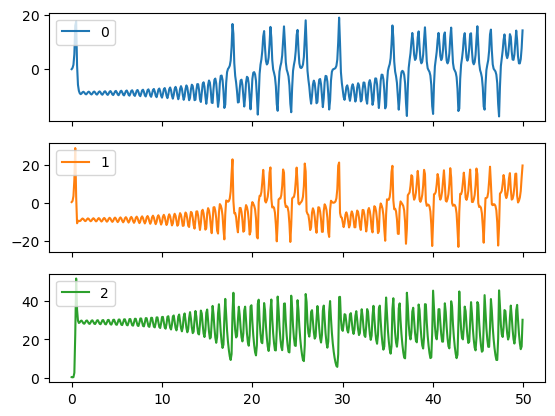

In [11]:
y0 = lorenz_step(0.005)

y0.plot(subplots=True)

Si integramos para $Δt = \{0.05, 0.01, 0.006\}$,
y graficamos la diferencia respecto del anterior,
vemos que las soluciones se mantienen cerca por mayor tiempo
a medida que el paso se acerca más a $Δt = 0.005$:

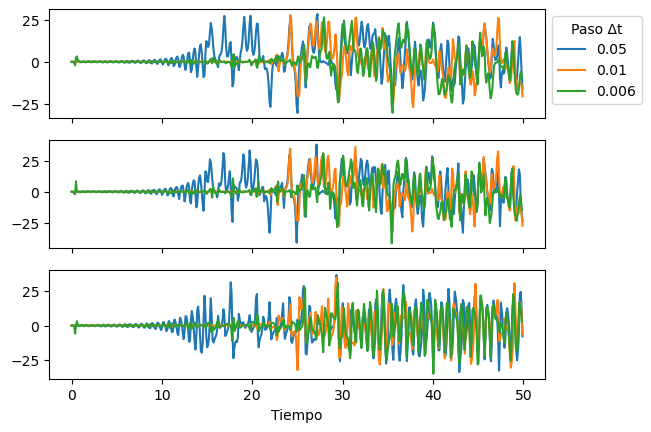

In [12]:
fig, axes = plt.subplots(3, sharex=True)

dts = (0.05, 0.01, 0.006)
for dt in dts:
    y = lorenz_step(dt)
    plot_diff(y0, y, axes=axes)
axes[-1].set(xlabel="Tiempo")
axes[0].legend(dts, title="Paso Δt", bbox_to_anchor=(1, 1), loc="upper left")

## 3) Inestabilidades en flujos estratificados

> Haciendo uso del solver BOUSS en GHOST,
resuelva numéricamente las ecuaciones para un flujo incompresible con $ρ_0=1$,
en un recinto cubico de longitud $4π × 2π × 2π$
y resolución espacial $N_x=256$, $N_y=16$, $N_z=128$.
Hacer uso del Material Adicional.
Utilice como condición inicial el siguiente perfil para la velocidad horizontal
> $$ \frac{u}{u_0} = \tanh[γ(z − π/2)] + \tanh[γ(−z + 3π/2)] − 1 \tag{6} $$
> donde $γ$ controla la pendiente de la tangente hiperbólica,
y por lo tanto el gradiente de la velocidad inicial.
A la vez, perturbe este perfil con un campo de velocidad aleatorio con amplitud $u_1$.

In [13]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import sympy
import xarray
from ghost_xarray import open_dataarray, open_dataset

plt.rc("figure", dpi=100, figsize=(6, 3))
path = Path("problema3/output")

### a)
> Grafique el perfil de la velocidad $u(z)$,
y calcule analíticamente el máximo número de Richardson en
función de la frecuencia de Brunt-Väisälä $N$ y de $γ$.

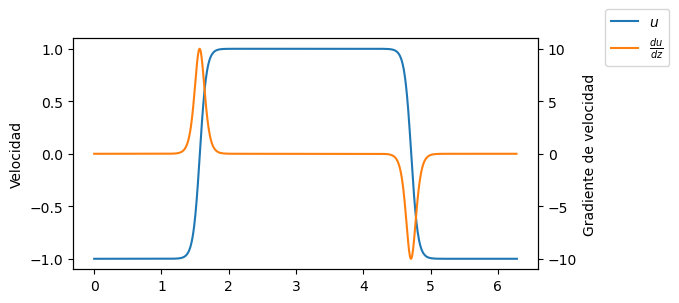

In [14]:
def initial_u(z, gamma):
    return np.tanh(gamma * (z - np.pi / 2)) + np.tanh(gamma * (-z + 3 * np.pi / 2)) - 1

z = np.linspace(0, 2 * np.pi, 2**10)
u = initial_u(z, 10)
dudz = np.diff(u) / np.diff(z)


fig, ax = plt.subplots()

ax.set(ylabel="Velocidad")
ax.plot(z, u, label="$u$")

ax2 = ax.twinx()
ax2.set(ylabel="Gradiente de velocidad")
ax2.plot(z[:-1], dudz, color="C1", label="$\\frac{du}{dz}$")

fig.legend(loc="upper left", bbox_to_anchor=(1, 1))

El número de Richardson, $R_i$, es:

$$ R_i = \frac{g}{ρ} \frac{∂ρ/∂z}{(∂u/∂z)^2} = \frac{N^2}{(∂u/∂z)^2} $$

donde
$g$ es la gravedad,
$ρ$ es la densidad,
$u$ es la velocidad,
$z$ es la profundidad, y
$N$ es el número de Brunt-Väisälä.

In [15]:
gamma, z = sympy.symbols("gamma z")
perfil_u = sympy.tanh(gamma * (z - sympy.pi / 2)) + sympy.tanh(gamma * (-z + 3 * sympy.pi / 2)) - 1

sympy.simplify(perfil_u)

-tanh(gamma*(2*z - 3*pi)/2) + tanh(gamma*(2*z - pi)/2) - 1

Derivando y evaluando el punto medio del gradiente de velocidad, $z = \pi / 2$:

In [16]:
sympy.simplify(sympy.diff(perfil_u, z).subs(z, sympy.pi / 2))

gamma*tanh(pi*gamma)**2

Entonces,
el valor para el numero de Richardson es:

$$ R_i(N, \gamma) = \frac{N^2}{\gamma^2 \tanh^4(\pi \gamma)} $$

que podríamos aproximar por

$$ R_i(N, \gamma) = \frac{N^2}{\gamma^2} $$

para $\gamma > 1$.

[Text(0.5, 0, '$\\gamma$'), Text(0.5, 1.0, '$N = 2$'), None, None]

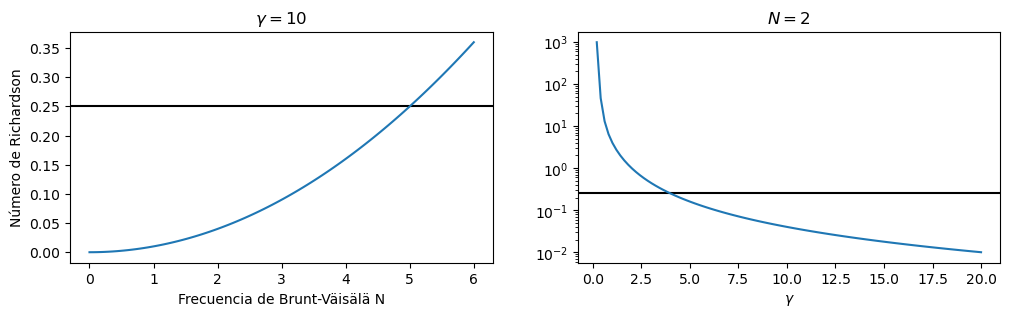

In [17]:
def richardson(N, gamma):
    return N**2 / gamma**2 / np.tanh(np.pi * gamma) ** 4


fig, ax = plt.subplots(1, 2, figsize=(12, 3))

for a in ax:
    a.axhline(1/4, color="black")
12
N = np.linspace(0, 6, 100)
ax[0].plot(N, richardson(N=N, gamma=10))
ax[0].set(
    xlabel="Frecuencia de Brunt-Väisälä N",
    ylabel="Número de Richardson",
    title="$\gamma = 10$",
)

gamma = np.linspace(0, 20, 100)[1:]
ax[1].plot(gamma, richardson(N=2, gamma=gamma))
ax[1].set(
    xlabel="$\gamma$",
    title="$N = 2$",
    xscale="linear",
    yscale="log",
)

### b)
> Calcule la resolución espacial $∆x$, $∆y$ y $∆z$.
¿Cómo justifica la elección de $∆y$ que resulta de los parámetros dados?
Para $u_0 = 1$ y asumiendo que $u_0 \gg u_1$,
estime $∆t$ usando la condición CFL.

La resolución espacial en cada coordenada es:

In [18]:
L = np.array([2, 1, 1])
N = np.array([256, 16, 128])

2 * np.pi * L / N

array([0.04908739, 0.39269908, 0.04908739])

Como $u \sim 1$,
la condición CFL requiere un $\Delta t < 0.05$.

Para el solver,
vamos a usar un $\Delta t$ 10 veces más pequeño:

In [19]:
dt_CFL = 0.05
dt_solver = dt_CFL / 10

t_total = 10
N_steps = t_total / dt_solver

dt_save = 0.5
N_step_save = dt_save / dt_solver

print("             Paso Δt:", dt_solver)
print("             N pasos:", N_steps)
print("Guardar cada N pasos:", N_step_save)

             Paso Δt: 0.005
             N pasos: 2000.0
Guardar cada N pasos: 100.0


Coordenadas y función para abrir simulaciones:

In [20]:
coords = {i: np.linspace(0, Li, Ni) for i, Li, Ni in zip("xyz", L, N)}


def open_simulation(name, var_names=["v", "wy", "th"]):
    return open_dataset(
        path / name,
        var_names,
        dt=dt_save,
        shape=coords,
        dtype=np.float32,
    )

### c)
> Realice una simulación con
$u_0 = 1$,
$u_1 = 0.1$,
$ν = κ = 2 × 10^{-3}$,
$N = 2$ y
$γ = 10$
hasta $t = 10$.
Guarde el campo de velocidad y la temperatura para $∆t ≤ 0.6$.
Estudie la evolución temporal de $u$, $ω_y$ y de la temperatura $θ$.
¿Qué observa?

In [21]:
data = open_simulation("punto_c")
data

<xarray.Dataset>
Dimensions:  (x: 256, y: 16, z: 128, t: 21, i: 3)
Coordinates:
  * x        (x) float64 0.0 0.007843 0.01569 0.02353 ... 1.976 1.984 1.992 2.0
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.007874 0.01575 0.02362 ... 0.9843 0.9921 1.0
  * t        (t) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 7.5 8.0 8.5 9.0 9.5 10.0
  * i        (i) object 'z' 'x' 'y'
Data variables:
    v        (i, t, x, y, z) float32 dask.array<chunksize=(1, 1, 256, 16, 128), meta=np.ndarray>
    wy       (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    th       (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>

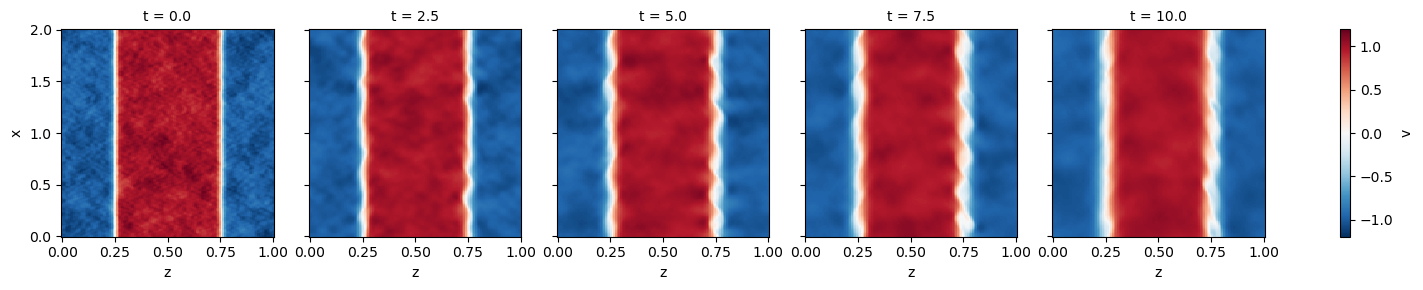

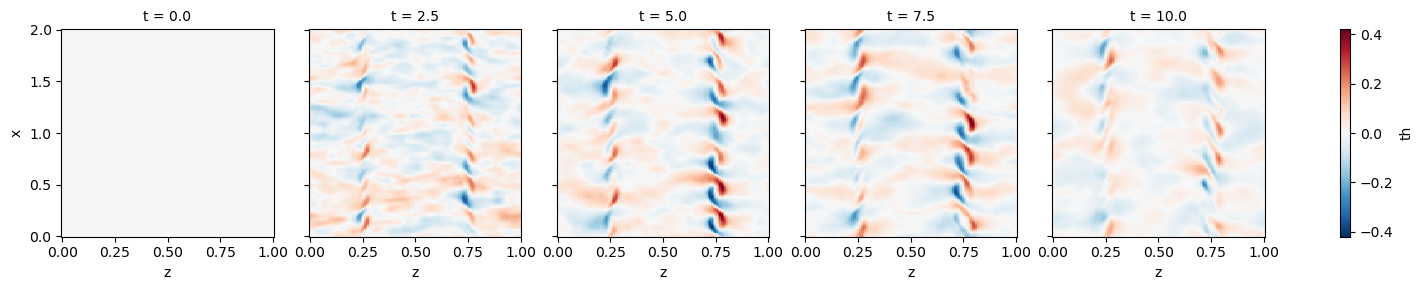

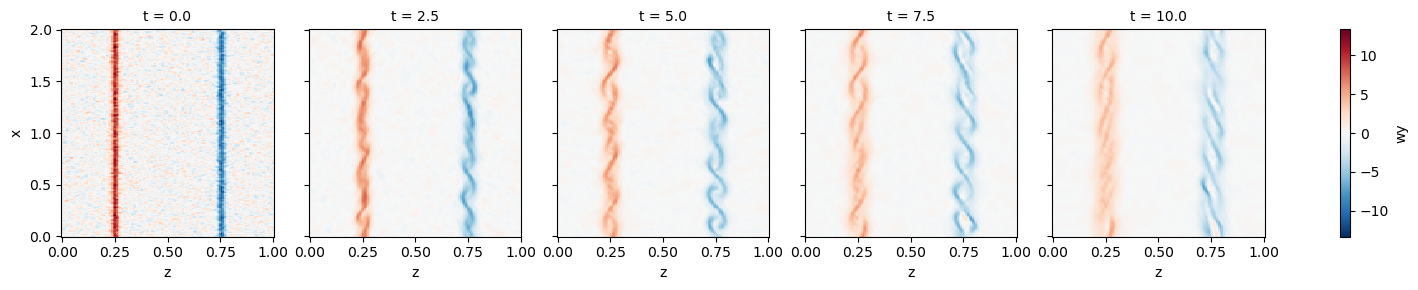

In [22]:
corte = data.isel(y=8, t=slice(0, None, 5))
corte.v.sel(i="x").plot(col="t")
corte.th.plot(col="t")
corte.wy.plot(col="t")

Para las 3 variables,
se observa que se produce una inestabilidad
en las regiones donde hay un gradiente de velocidad.
Esta parece crecer espacialmente
a medida que evoluciona el tiempo.

Es importante que haya perturbaciones en el campo de velocidad
para que se produzca la inestabilidad.
Si apagamos la perturbación
($u_1 = 0$ en los parámetros del solver),
el gradiente se suaviza por difusión,
pero no se desarrolla la inestabilidad,
que requiere romper la simetría:

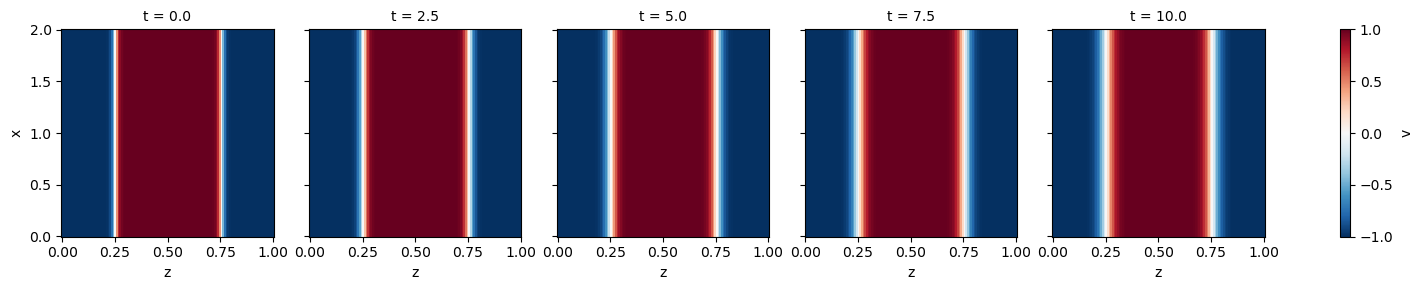

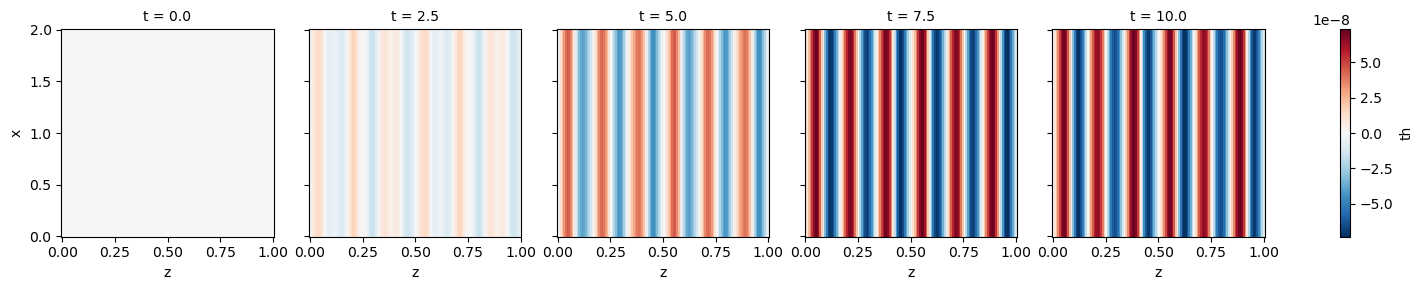

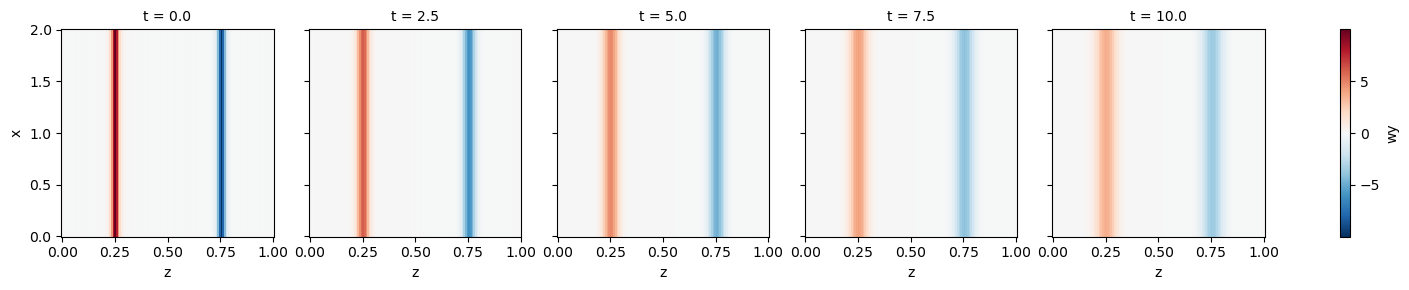

In [23]:
data = open_simulation("random0")
corte = data.isel(y=8, t=slice(0, None, 5))
corte.v.sel(i="x").plot(col="t")
corte.th.plot(col="t")
corte.wy.plot(col="t")

### d)
> Con los mismos parámetros del punto c),
realice ahora simulaciones variando $N$ entre $0$ y $6$ (pasos de a $1$).
¿Qué ocurre?
Estime la tasa de crecimiento de la inestabilidad
en función del máximo número de Richardson en el flujo.

In [24]:
def open_many(name, variable):
    files = path.glob(f"{name}*")
    files = [(file.stem.removeprefix(name), file) for file in files]
    files = sorted(files, key=lambda x: float(x[0]))
    return xarray.merge(open_dataarray(
        file,
        variable,
        dt=dt_save,
        shape=coords,
        dtype=np.float32,
    ).rename(name) for name, file in files)

In [25]:
data_N = open_many("N", "vx")
data_N

<xarray.Dataset>
Dimensions:  (x: 256, y: 16, z: 128, t: 21)
Coordinates:
  * x        (x) float64 0.0 0.007843 0.01569 0.02353 ... 1.976 1.984 1.992 2.0
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.007874 0.01575 0.02362 ... 0.9843 0.9921 1.0
  * t        (t) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 7.5 8.0 8.5 9.0 9.5 10.0
Data variables:
    0        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    1        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    2        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    3        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    4        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    5        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    6        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>

A medida que crece el número de Brunt-Väisälä $N$,
el efecto restaurativo de la gravedad en el flujo estratificado es mayor,
y las perturbaciones en la interfaz no generan un mezclado del fluido.

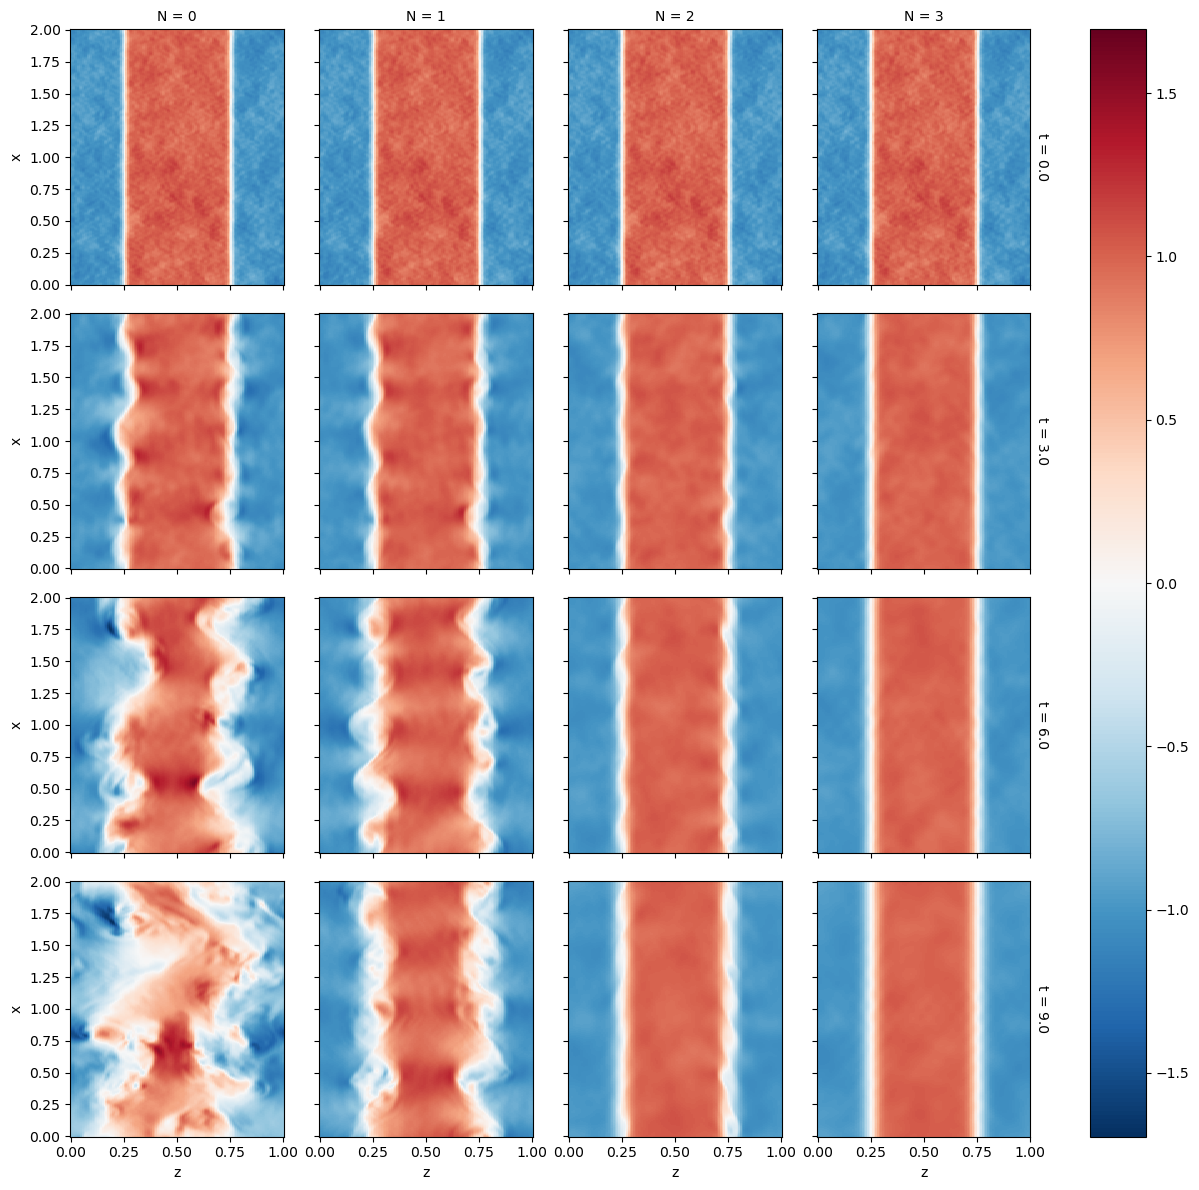

In [26]:
data_N.to_array("N").isel(y=8, t=slice(0, None, 6), N=slice(0, 4)).plot(col="N", row="t")

En particular,
para $\gamma = 2$,
el número de Richardson es mayor al número crítico de $1/4$
cuando $N > 5$,
y el sistema se vuelve estable.

[Text(0.5, 0, 'Frecuencia de Brunt-Väisälä N'),
 Text(0, 0.5, 'Número de Richardson'),
 Text(0.5, 1.0, '$\\gamma = 2$')]

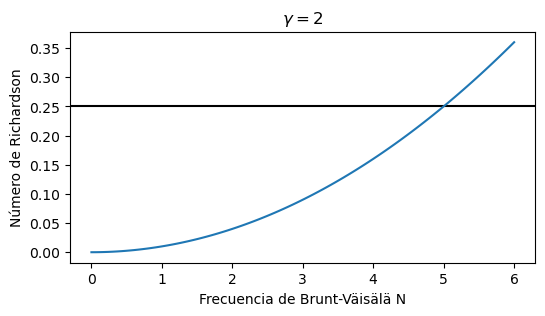

In [27]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=100)
ax.axhline(1/4, color="black")

N = np.linspace(0, 6, 100)
ax.plot(N, richardson(N=N, gamma=10))
ax.set(
    xlabel="Frecuencia de Brunt-Väisälä N",
    ylabel="Número de Richardson",
    title="$\gamma = 2$",
)

Para ver la tasa de crecimiento de la inestabilidad,
vamos a tomar un corte alrededor de una de las inestabilidades:

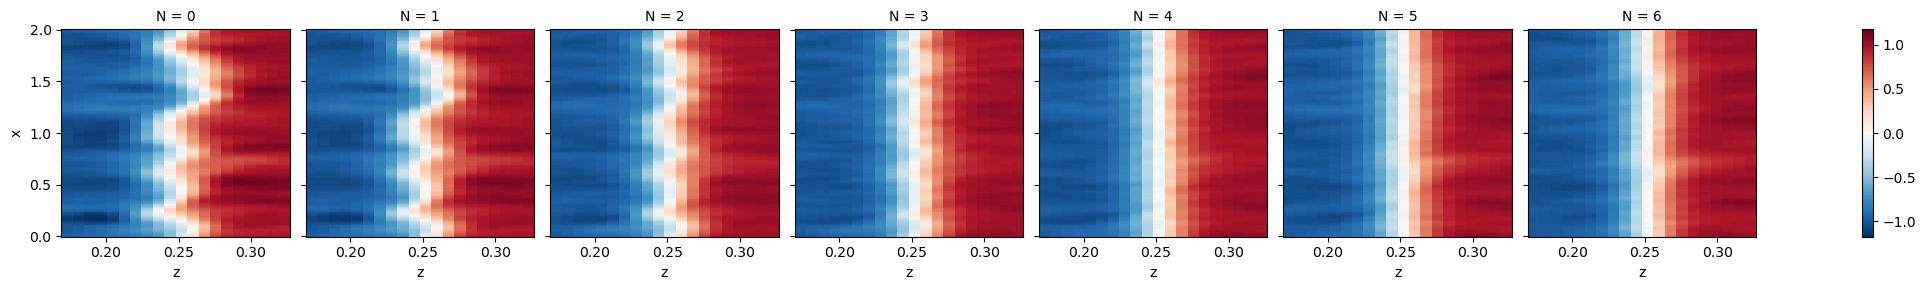

In [28]:
corte = data_N.to_array("N").isel(z=slice(22, 42))

corte.isel(y=8, t=3).plot(col="N")

Tomando como métrica para la inestabilidad
a la desviación estándar de la componente $x$ de la velocidad,
obtenemos los siguientes perfiles en función del tiempo:

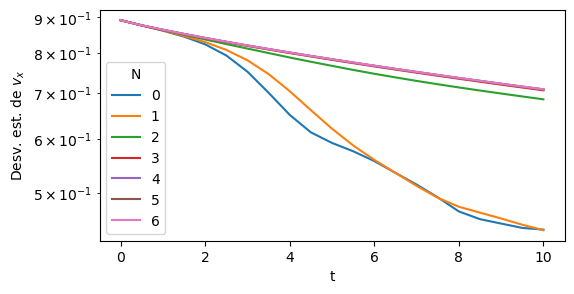

In [29]:
inestabilidad = corte.std(["x", "y", "z"])

inestabilidad.plot.line(x="t")
plt.ylabel("Desv. est. de $v_x$")
plt.yscale("log")

Al inicio,
para $t < 2$,
el desarrollo de la inestabilidad se produce variaciones de la velocidad
que evolucionan de manera exponencial.
Ajustando dicha tasa de decaimiento en función de $N$,
obtenemos que esta se estabiliza para $N \sim 5$,
que es cuando el número de Richardson cruza el valor crítico de $1/4$.

Text(0.5, 1.0, '$t < 2$')

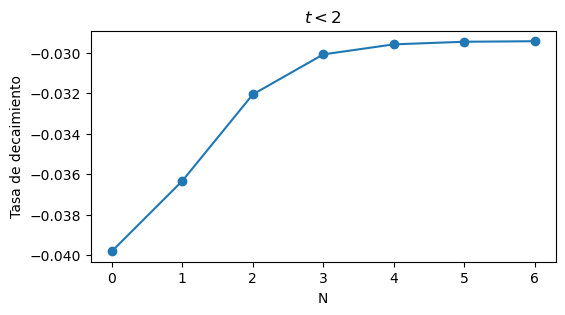

In [30]:
def slope(x):
    return np.log(x).polyfit("t", 1).sel(degree=1)


slopes = inestabilidad.sel(t=slice(0, 2)).groupby("N").map(slope)["polyfit_coefficients"]
slopes.assign_coords(N=slopes.N.astype(int)).plot(marker="o")
plt.ylabel("Tasa de decaimiento")
plt.title("$t < 2$")

### e)
> Con los mismos parámetros del punto c),
fije ahora $N = 2$
y varíe $γ$ entre $5$ y $20$ (pasos de a $5$).
Grafique el número de onda del modo más inestable
en función de $γ$
(ayuda: puede estimar este número de onda
contando cuantos máximos de la vorticidad $ω_y$ aparecen a lo largo de un corte horizontal
a medida que se desarrolla la inestabilidad)

In [31]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import sympy
import xarray
from ghost_xarray import open_dataarray, open_dataset

plt.rc("figure", dpi=100, figsize=(6, 3))
path = Path("problema3/output")
L = np.array([2, 1, 1])
N = np.array([256, 16, 128])

2 * np.pi * L / N
dt_CFL = 0.05
dt_solver = dt_CFL / 10

t_total = 10
N_steps = t_total / dt_solver

dt_save = 0.5
N_step_save = dt_save / dt_solver

print("             Paso Δt:", dt_solver)
print("             N pasos:", N_steps)
print("Guardar cada N pasos:", N_step_save)
coords = {i: np.linspace(0, Li, Ni) for i, Li, Ni in zip("xyz", L, N)}


def open_simulation(name, var_names=["v", "wy", "th"]):
    return open_dataset(
        path / name,
        var_names,
        dt=dt_save,
        shape=coords,
        dtype=np.float32,
    )

def open_many(name, variable):
    files = path.glob(f"{name}*")
    files = [(file.stem.removeprefix(name), file) for file in files]
    files = sorted(files, key=lambda x: float(x[0]))
    return xarray.merge(open_dataarray(
        file,
        variable,
        dt=dt_save,
        shape=coords,
        dtype=np.float32,
    ).rename(name) for name, file in files)

             Paso Δt: 0.005
             N pasos: 2000.0
Guardar cada N pasos: 100.0


In [32]:
data_gamma = open_many("gamma", "wy")
data_gamma

<xarray.Dataset>
Dimensions:  (x: 256, y: 16, z: 128, t: 21)
Coordinates:
  * x        (x) float64 0.0 0.007843 0.01569 0.02353 ... 1.976 1.984 1.992 2.0
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.007874 0.01575 0.02362 ... 0.9843 0.9921 1.0
  * t        (t) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 7.5 8.0 8.5 9.0 9.5 10.0
Data variables:
    5        (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    10       (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    15       (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>
    20       (t, x, y, z) float32 dask.array<chunksize=(1, 256, 16, 128), meta=np.ndarray>

Si graficamos $\omega_y$
en función del tiempo (filas)
y de $\gamma$ (columnas),
vemos que la inestabilidad crece más rapidamente
cuando el gradiente de valocidad ($\gamma$) es mayor.

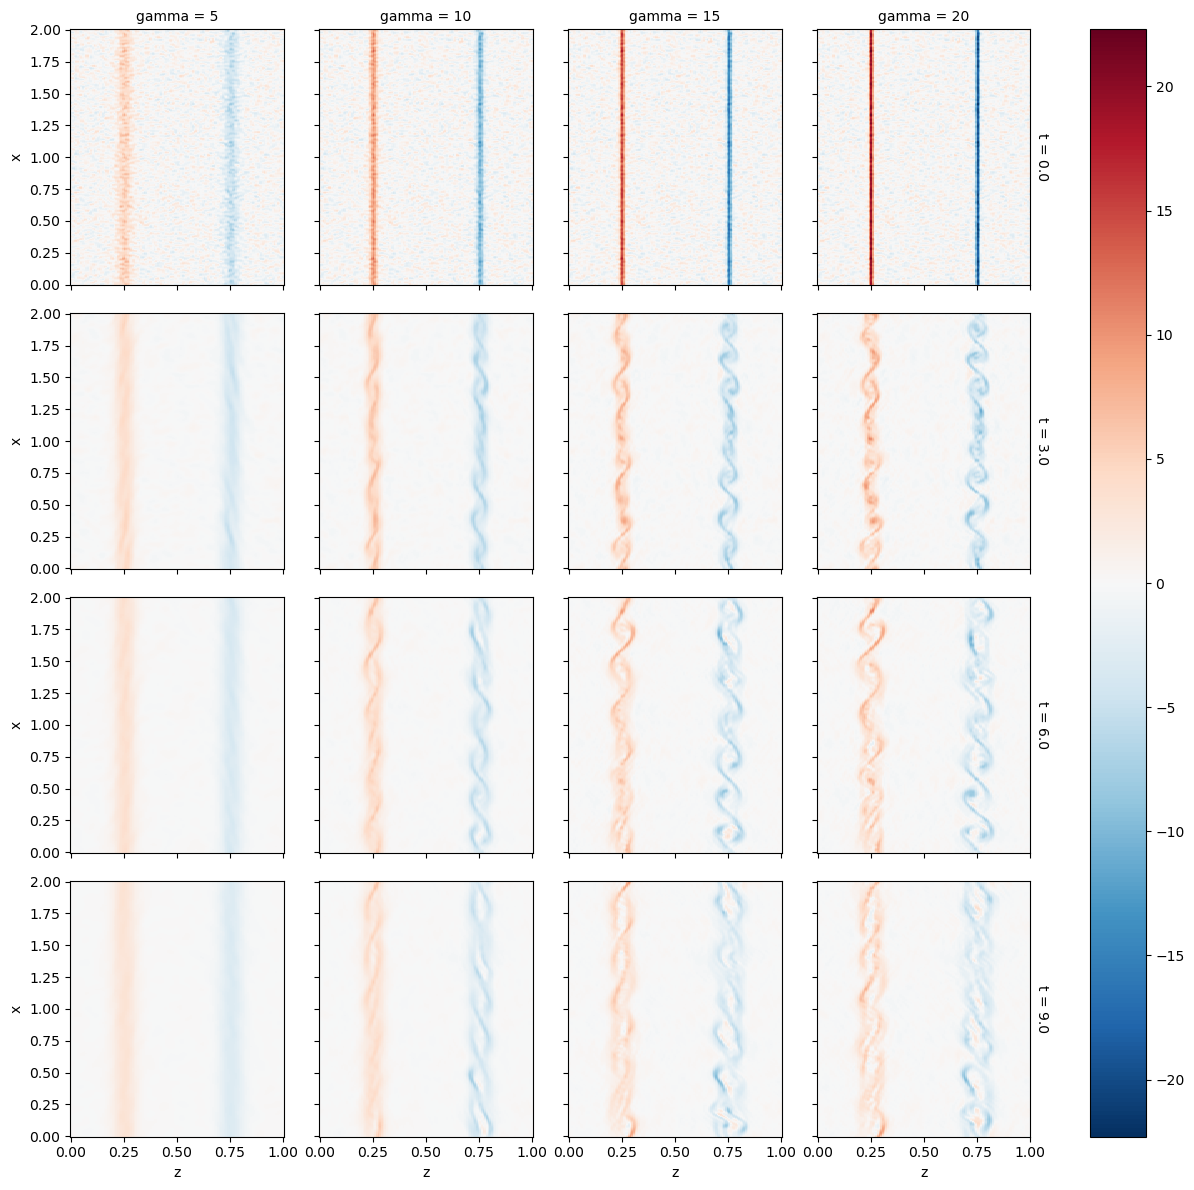

In [33]:
data_gamma.isel(y=8).sel(t=slice(0, None, 6)).to_array("gamma").plot(col="gamma", row="t")

In [34]:
def normalize(x):
    vmin, vmax = np.percentile(x, (2, 98))
    return (x - vmin) / (vmax - vmin)

Hacemos un zoom en una de las zonas de inestabilidad, graficando:

In [35]:
inestabilidad = data_gamma.isel(z=slice(32, 40), t=10)

- para un $y$ fijo:

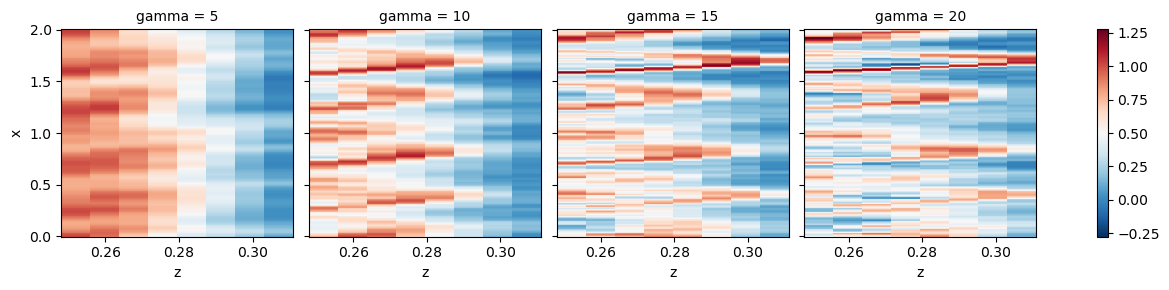

In [36]:
inestabilidad.isel(y=8).map(normalize).to_array("gamma").plot(col="gamma", center=0.5)

- para un $z$ fijo:

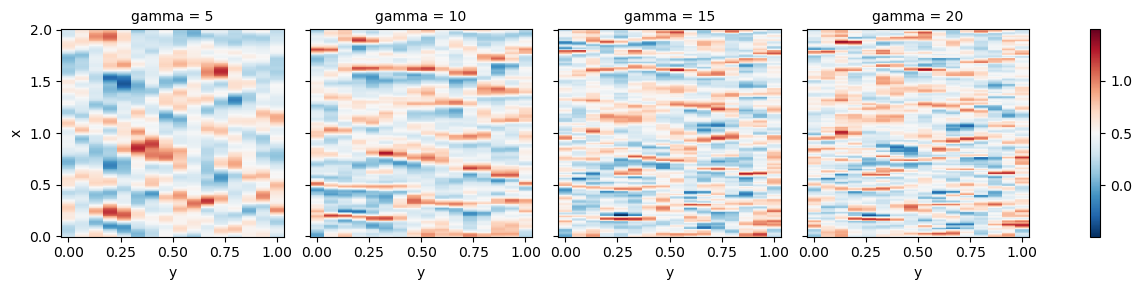

In [37]:
inestabilidad.sel(z=0.27, method="nearest").map(normalize).to_array("gamma").plot(col="gamma", center=0.5)

- un perfil para $y$ y $z$ fijos:

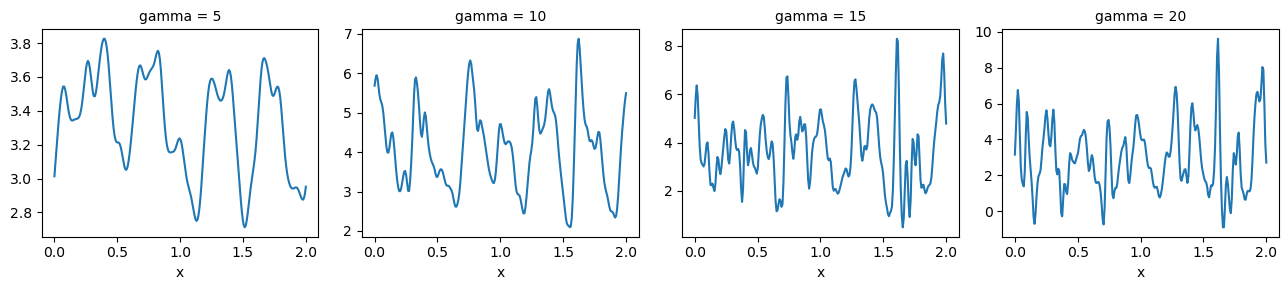

In [38]:
perfil = inestabilidad.isel(y=8).sel(z=0.27, method="nearest").compute()

perfil.to_array("gamma").plot(col="gamma", sharey=False)

En la vorticidad,
se ven estructuras cuya longitud de onda disminuye
a medida que crece $\gamma$.

Para calcular la longitud del modo predominante,
vamos a realizar la transfomada de Fourier a estos perfiles:

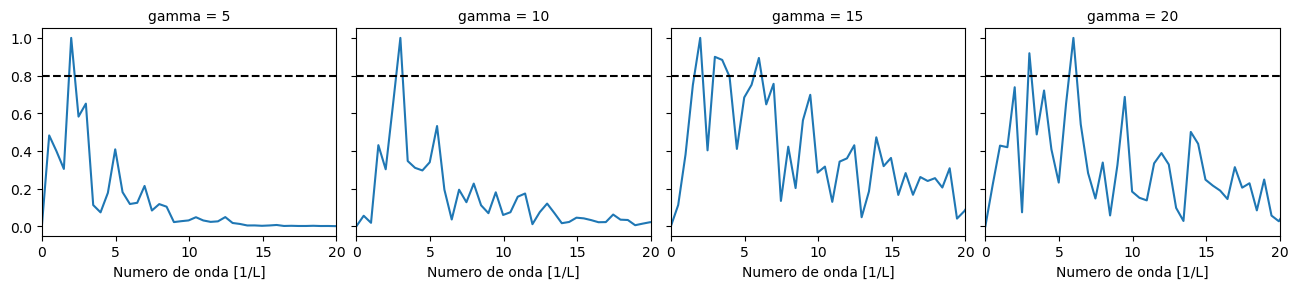

In [39]:
def abs_rfft(x):
    x = x - x.mean()
    k = np.abs(np.fft.rfft(x))
    k = k / k.max()
    dx = x.x.diff("x").values.mean()
    freq = np.fft.rfftfreq(x.size, d=dx)
    return xarray.DataArray(k, coords={"numero_de_onda": freq})


espectro = perfil.map(abs_rfft)
axes = espectro.to_array("gamma").plot.line(x="numero_de_onda", col="gamma")
for ax in axes.axes.flat:
    ax.axhline(0.8, color="black", linestyle="--")
    ax.set(xlabel="Numero de onda [1/L]", xlim=(0, 20))

Para los modos que superan ese umbral (arbitrario),
graficamos el número de modo en función de $\gamma$:

Text(0, 0.5, 'Número de onda')

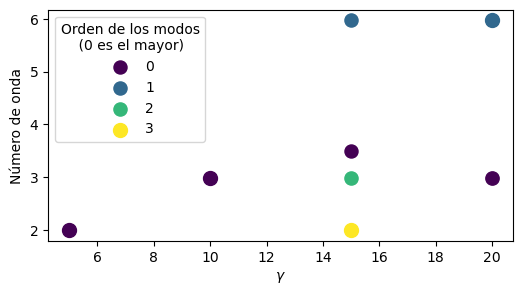

In [40]:
k = espectro.to_pandas()
max_k = k[k > 0.8]

N = max_k.count().max()
colors = plt.get_cmap("viridis")(np.linspace(0, 1, N))

for gamma, k in max_k.items():
    k = k.dropna().sort_values()
    for i, (ki, size) in enumerate(k.items()):
        label = i if len(k) == N else "_"
        plt.scatter(float(gamma), ki, s=size * 100, color=colors[i], label=label)
plt.legend(title="Orden de los modos\n    (0 es el mayor)")
plt.xlabel("$\gamma$")
plt.ylabel("Número de onda")